In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn, optim
from torchvision import datasets, transforms


import shutil
import os

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu") # Use GPU or CPU for training
device

'cuda'

## AlexNet Implementation

In [3]:
class AlexNet(nn.Module):

    def __init__(self, num_classes: int = 8):
        super(AlexNet, self).__init__()

        self.convolutional = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.linear = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 8)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        x = self.convolutional(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.linear(x)
        return torch.softmax(x, 1)

In [4]:
seed = torch.initial_seed()
# create model
model = AlexNet(num_classes=8)
model = model.to(device)

In [5]:
print(model)

AlexNet(
  (convolutional): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (linear): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)


In [6]:
transform = transforms.Compose([
          transforms.Resize((90, 90)),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize(mean=[0.5, 0.5,0.5], std=[0.5,0.5,0.5])
          ])

batch_size = 64
image_folder = '../Images'
data = datasets.ImageFolder(image_folder, transform=transform)

In [7]:
print(data.classes)
print(len(data))

['ANIMAL_STICKERS', 'BATH_SPONGE', 'COLOURING_PENCILS', 'CUSHION_COVER', 'Pencil_Eraser', 'Pencil_Sharpener', 'RED_PURSE', 'WASHBAG']
873


In [8]:
train_set, test_set = torch.utils.data.random_split(data, [int(len(data) * 0.90), len(data) - int(len(data) * 0.90)])
train_data_size = len(train_set)
test_data_size = len(test_set)

In [9]:
train_data_size

785

In [10]:
test_data_size

88

In [11]:
trainLoader = torch.utils.data.DataLoader(train_set,batch_size=batch_size, shuffle=True)
testLoader  = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [13]:
epochs = 50
train_loss = []

for epoch in range(epochs):
   
    total_train_loss = 0
    
    # training our model
    for idx, (image, label) in enumerate(trainLoader):
        image, label = image.to(device), label.to(device)

        optimizer.zero_grad()
        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)

    print(f'Epoch: {epoch} | Train Loss: {total_train_loss}')

Epoch: 0 | Train Loss: 2.0767650237450233
Epoch: 1 | Train Loss: 2.0700661219083347
Epoch: 2 | Train Loss: 2.028661168538607
Epoch: 3 | Train Loss: 1.9260616852686956
Epoch: 4 | Train Loss: 1.8961191819264338
Epoch: 5 | Train Loss: 1.8932401216947115
Epoch: 6 | Train Loss: 1.9093396480266864
Epoch: 7 | Train Loss: 1.8180796549870417
Epoch: 8 | Train Loss: 1.7913600481473482
Epoch: 9 | Train Loss: 1.7974500289330115
Epoch: 10 | Train Loss: 1.8457593275950506
Epoch: 11 | Train Loss: 1.805008026269766
Epoch: 12 | Train Loss: 1.791366430429312
Epoch: 13 | Train Loss: 1.7674935781038725
Epoch: 14 | Train Loss: 1.7674533954033484
Epoch: 15 | Train Loss: 1.7608006734114428
Epoch: 16 | Train Loss: 1.727322633449848
Epoch: 17 | Train Loss: 1.7379437134816096
Epoch: 18 | Train Loss: 1.7369741109701304
Epoch: 19 | Train Loss: 1.7641377632434552
Epoch: 20 | Train Loss: 1.770104142335745
Epoch: 21 | Train Loss: 1.7251509061226478
Epoch: 22 | Train Loss: 1.7466530524767363
Epoch: 23 | Train Loss: 1.

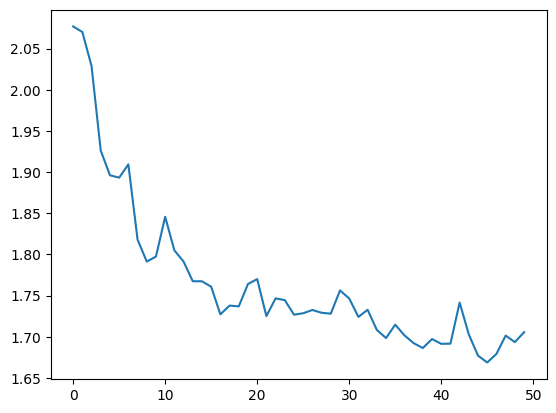

In [14]:
plt.plot(train_loss)

In [15]:
correct = 0
total = 0

# Set the model to evaluation mode
model.eval()

# Iterate through the training data
with torch.no_grad():
    for images, labels in trainLoader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Get predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Count correct predictions
        correct += (predicted == labels).sum().item()
        
        # Count total number of samples
        total += labels.size(0)

# Calculate accuracy
train_accuracy = correct / total * 100
print(f'Training accuracy: {train_accuracy:.2f}%')


Training accuracy: 51.08%


In [16]:
from sklearn.metrics import classification_report

# Set the model to evaluation mode
model.eval()

true_labels_train = []
predicted_labels_train = []

# Iterate through the training data
with torch.no_grad():
    for images, labels in trainLoader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Get predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Append true and predicted labels
        true_labels_train.extend(labels.cpu().numpy())
        predicted_labels_train.extend(predicted.cpu().numpy())

# Generate classification report for training set
report_train = classification_report(true_labels_train, predicted_labels_train)

print("Classification Report for Training Set:")
print(report_train)


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70        92
           1       0.09      0.01      0.02        86
           2       0.57      0.66      0.61       101
           3       0.75      0.35      0.48       112
           4       0.00      0.00      0.00        84
           5       0.67      0.64      0.66       104
           6       0.68      0.95      0.79        86
           7       0.29      0.67      0.40       120

    accuracy                           0.52       785
   macro avg       0.46      0.50      0.46       785
weighted avg       0.48      0.52      0.47       785



c:\Users\timmy\Downloads\DS-interview-part-2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\timmy\Downloads\DS-interview-part-2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\timmy\Downloads\DS-interview-part-2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [17]:
correct = 0
total = 0

# Set the model to evaluation mode
model.eval()

# Iterate through the test data
with torch.no_grad():
    for images, labels in testLoader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Get predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Count correct predictions
        correct += (predicted == labels).sum().item()
        
        # Count total number of samples
        total += labels.size(0)

# Calculate accuracy
test_accuracy = correct / total * 100
print(f'Test accuracy: {test_accuracy:.2f}%')


Test accuracy: 52.27%


In [18]:
# Set the model to evaluation mode
model.eval()

true_labels_test = []
predicted_labels_test = []

# Iterate through the test data
with torch.no_grad():
    for images, labels in testLoader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Get predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Append true and predicted labels
        true_labels_test.extend(labels.cpu().numpy())
        predicted_labels_test.extend(predicted.cpu().numpy())

# Generate classification report for test set
report_test = classification_report(true_labels_test, predicted_labels_test)

print("Classification Report for Test Set:")
print(report_test)


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.00      0.00      0.00         9
           2       0.46      0.67      0.55         9
           3       0.67      0.25      0.36         8
           4       0.00      0.00      0.00        12
           5       0.73      0.57      0.64        14
           6       0.69      1.00      0.81        11
           7       0.31      0.91      0.47        11

    accuracy                           0.53        88
   macro avg       0.45      0.51      0.45        88
weighted avg       0.47      0.53      0.47        88



c:\Users\timmy\Downloads\DS-interview-part-2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\timmy\Downloads\DS-interview-part-2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\timmy\Downloads\DS-interview-part-2\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

## ResNet 18

In [19]:
class BasicBlock(nn.Module):
  """A basic building block for ResNet."""

  def __init__(self, in_channels, out_channels, stride=1):
    super(BasicBlock, self).__init__()

    self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
    self.bn1 = nn.BatchNorm2d(out_channels)
    self.relu1 = nn.ReLU(inplace=True)

    self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
    self.bn2 = nn.BatchNorm2d(out_channels)

    self.shortcut = nn.Sequential()  # Identity shortcut for residual connection

    # If increasing feature map size, add padding layer to shortcut
    if stride != 1 or in_channels != out_channels:
      self.shortcut = nn.Sequential(
          nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
          nn.BatchNorm2d(out_channels)
      )

  def forward(self, x):
    out = self.conv1(x)
    out = self.bn1(out)
    out = self.relu1(out)

    out = self.conv2(out)
    out = self.bn2(out)

    out += self.shortcut(x)  # Residual connection
    out = self.relu1(out)
    return out


class ResNet18(nn.Module):
  """A basic ResNet-18 architecture."""

  def __init__(self, num_classes=8):
    super(ResNet18, self).__init__()

    self.in_channels = 64

    self.conv1 = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True)
    )

    self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    self.layer1 = self._make_layer(BasicBlock, 64, 128, 2)
    self.layer2 = self._make_layer(BasicBlock, 128, 256, 2)
    self.layer3 = self._make_layer(BasicBlock, 256, 512, 2)
    self.layer4 = self._make_layer(BasicBlock, 512, 512, 2)

    self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
    self.fc = nn.Linear(512, num_classes)

  def _make_layer(self, block_class, in_channels, out_channels, blocks, stride=1):
    """
    Helper function to build a stack of ResNet blocks.
    """
    layers = []
    layers.append(block_class(in_channels, out_channels, stride))
    for _ in range(1, blocks):
      layers.append(block_class(out_channels, out_channels, 1))
    return nn.Sequential(*layers)

  def forward(self, x):
    out = self.conv1(x)
    out = self.pool(out)

    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)

    out = self.avgpool(out)
    out = torch.flatten(out, 1)
    out = self.fc(out)
    return out


In [20]:
seed = torch.initial_seed()
# create model
model = ResNet18()
model = model.to(device)

In [21]:
print(model)

ResNet18(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (

In [22]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [23]:
epochs = 30
train_loss = []

for epoch in range(epochs):
   
    total_train_loss = 0
    
    # training our model
    for idx, (image, label) in enumerate(trainLoader):
        image, label = image.to(device), label.to(device)

        optimizer.zero_grad()
        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)

    print(f'Epoch: {epoch} | Train Loss: {total_train_loss}')

Epoch: 0 | Train Loss: 1.5368927717208862
Epoch: 1 | Train Loss: 1.2673275699982276
Epoch: 2 | Train Loss: 1.0355117000066316
Epoch: 3 | Train Loss: 0.9687307752095736
Epoch: 4 | Train Loss: 0.8096514390065119
Epoch: 5 | Train Loss: 0.7114783846415006
Epoch: 6 | Train Loss: 0.6822187900543213
Epoch: 7 | Train Loss: 0.5903596671727988
Epoch: 8 | Train Loss: 0.5911454329123864
Epoch: 9 | Train Loss: 0.5825311839580536
Epoch: 10 | Train Loss: 0.4581428514077113
Epoch: 11 | Train Loss: 0.4301915317773819
Epoch: 12 | Train Loss: 0.3772742301225662
Epoch: 13 | Train Loss: 0.3485136307202853
Epoch: 14 | Train Loss: 0.2866777708897224
Epoch: 15 | Train Loss: 0.3028712226794316
Epoch: 16 | Train Loss: 0.2644676611973689
Epoch: 17 | Train Loss: 0.24803030548187402
Epoch: 18 | Train Loss: 0.22736182522315246
Epoch: 19 | Train Loss: 0.20567262631196243
Epoch: 20 | Train Loss: 0.27065184024664074
Epoch: 21 | Train Loss: 0.18647020539412132
Epoch: 22 | Train Loss: 0.1873572228046564
Epoch: 23 | Trai

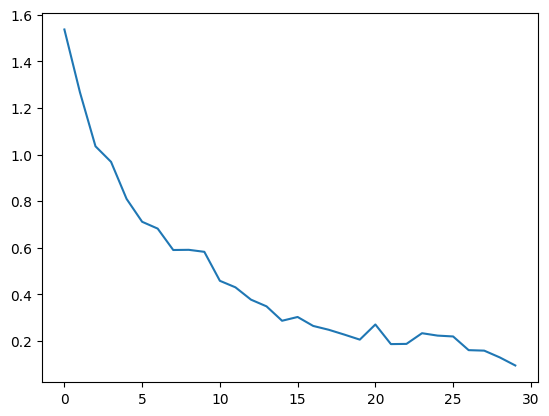

In [24]:
plt.plot(train_loss)

In [25]:
from sklearn.metrics import classification_report

# Set the model to evaluation mode
model.eval()

true_labels_train = []
predicted_labels_train = []

# Iterate through the training data
with torch.no_grad():
    for images, labels in trainLoader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Get predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Append true and predicted labels
        true_labels_train.extend(labels.cpu().numpy())
        predicted_labels_train.extend(predicted.cpu().numpy())

# Generate classification report for training set
report_train = classification_report(true_labels_train, predicted_labels_train)

print("Classification Report for Training Set:")
print(report_train)


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        92
           1       0.64      1.00      0.78        86
           2       0.97      0.84      0.90       101
           3       0.94      0.99      0.97       112
           4       1.00      0.81      0.89        84
           5       0.96      0.94      0.95       104
           6       1.00      0.99      0.99        86
           7       1.00      0.83      0.91       120

    accuracy                           0.92       785
   macro avg       0.94      0.92      0.92       785
weighted avg       0.94      0.92      0.92       785



In [26]:
# Set the model to evaluation mode
model.eval()

true_labels_test = []
predicted_labels_test = []

# Iterate through the test data
with torch.no_grad():
    for images, labels in testLoader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Get predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Append true and predicted labels
        true_labels_test.extend(labels.cpu().numpy())
        predicted_labels_test.extend(predicted.cpu().numpy())

# Generate classification report for test set
report_test = classification_report(true_labels_test, predicted_labels_test)

print("Classification Report for Test Set:")
print(report_test)


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.44      0.89      0.59         9
           2       0.38      0.33      0.35         9
           3       0.73      1.00      0.84         8
           4       0.80      0.33      0.47        12
           5       0.73      0.57      0.64        14
           6       1.00      0.91      0.95        11
           7       0.88      0.64      0.74        11

    accuracy                           0.70        88
   macro avg       0.72      0.71      0.69        88
weighted avg       0.74      0.70      0.69        88



## This is the best model

In [27]:
import torch

# Assuming your model is named 'model' and you want to save it after training
def save_model(model, path):
  """Saves the model's state dictionary to a file."""
  torch.save(model.state_dict(), path)

# Example usage after training loop
save_model(model, "my_model_weights.pth")  # Replace with your desired path


## Inference

In [42]:
import torch
from torchvision import transforms
import cv2
from PIL import Image


def preprocess_image(img_path):
  """Preprocesses an image for inference."""
  img = cv2.imread(img_path)
  if img is None:
    raise ValueError(f"Failed to load image: {img_path}")

  # Convert OpenCV BGR image to RGB (expected by torchvision)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = Image.fromarray(img)  # Convert NumPy array to PIL Image

  resize = transforms.Resize((224, 224))  # Assuming AlexNet
  normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
  preprocess = transforms.Compose([resize, transforms.ToTensor(), normalize])
  img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension
  return img_tensor.to(device)  # Move to same device as the model


def predict(model_path, img_path):
  """Loads the model and makes inference on an image."""
  # Load the model state dictionary
  model = ResNet18()
  model = model.to(device) 
  model.load_state_dict(torch.load(model_path))
  model.eval()

  # Preprocess the image
  img_tensor = preprocess_image(img_path)

  # Perform inference
  with torch.no_grad():
    output = model(img_tensor)

  # Get the predicted class label (assuming you have 2 classes)
  predicted_class = torch.argmax(output, dim=1).item()
  return predicted_class


In [40]:
image = '../Images/Pencil_Eraser/41wTYwT1MdL._AC_UL320_.jpg'
img = cv2.imread(image)
print(f"Loaded image: {img is not None}") 

Loaded image: True


In [41]:
preprocess_image(image)

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9529, 0.9608, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
          [0.9216, 0.9373, 0.9451,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9529, 0.9608, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
          [0.9216, 0.9373, 0.9451,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1

In [43]:
# Example usage
image = '../Images/Pencil_Eraser/41wTYwT1MdL._AC_UL320_.jpg'
predicted_class = predict("my_model_weights.pth", image)
print(f"Predicted class: {predicted_class}")

Predicted class: 5


In [45]:
import os

def get_most_recent_file(folder_path='../static'):
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Filter out directories from the list of files
    files = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]
    
    # Sort files based on modification time
    files.sort(key=lambda x: os.path.getmtime(os.path.join(folder_path, x)), reverse=True)
    
    # Return the most recent file
    if files:
        return os.path.join(folder_path, files[0])
    else:
        return None


most_recent_file = get_most_recent_file(folder_path)
print(most_recent_file)


../static\image-4.jpg
